## Ashmal Vayani

### Task1 Iris Flowers Classification ML Project

In [1]:
#Let's read the data
import pandas as pd

In [2]:
iris_df = pd.read_csv("iris.data")
iris_df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


## Exploratory Data Analysis

In [3]:
iris_df.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
iris_df.shape

(149, 5)

In [6]:
#Checking for null value
iris_df.isnull().any()

5.1            False
3.5            False
1.4            False
0.2            False
Iris-setosa    False
dtype: bool

In [7]:
#Renaming the columns

cols = ["sepal length in cm",
        "sepal width in cm",
        "petal length in cm",
        "petal width in cm", "class"]
iris_df.columns = cols

iris_df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [8]:
#checking unique values of the class
class_counts = iris_df['class'].value_counts()
class_counts

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: class, dtype: int64

## Plotting Pie Chart, Count-Plot, Bar-Plot, Histogram, Pairplot, and Heatmap

([<matplotlib.patches.Wedge at 0x2998fbe8220>,
 [Text(-0.9487389286092589, -0.5566816373308495, 'Iris-versicolor'),
  Text(0.964011900074993, -0.5297934092774296, 'Iris-virginica'),
  Text(-0.016023914609076, 1.139887377840724, 'Iris-setosa')],
 [Text(-0.5174939610595958, -0.30364452945319065, '33.6%'),
  Text(0.5258246727681779, -0.28897822324223427, '33.6%'),
  Text(-0.008995881885797053, 0.6399367735246169, '32.9%')])

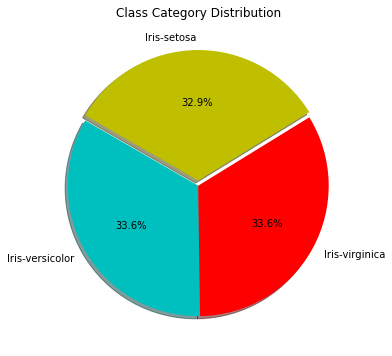

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

plt.figure(figsize=(12,6))
plt.title('Class Category Distribution')
plt.pie(class_counts, labels = class_counts.index, autopct='%1.1f%%', startangle=150, shadow=True, explode=[0,0,0.04], colors=["c","r","y"])

Text(0.5, 1.0, 'Count Plot for Class Category Distribution')

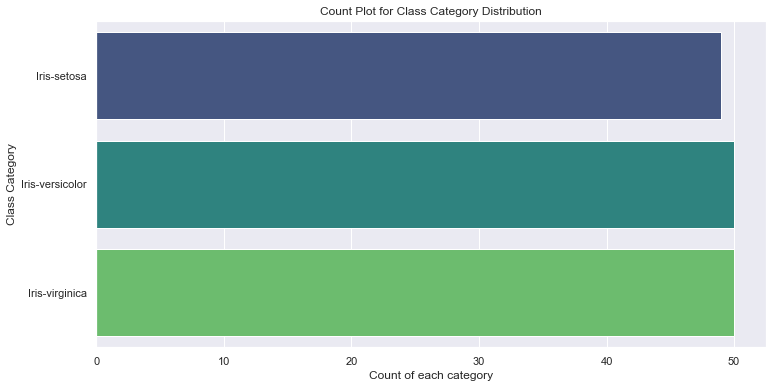

In [10]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,6))
sns.countplot(y='class',data=iris_df, palette='viridis')
plt.xlabel("Count of each category")
plt.ylabel("Class Category")
plt.title('Count Plot for Class Category Distribution')

Text(0.5, 1.0, 'Bar Plot')

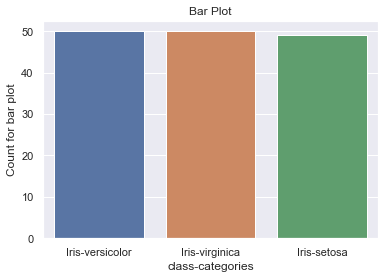

In [11]:
sns.barplot(x=iris_df["class"].value_counts().index, y=iris_df["class"].value_counts(), orient="v")
plt.ylabel('Count for bar plot')
plt.xlabel('class-categories')
plt.title("Bar Plot")

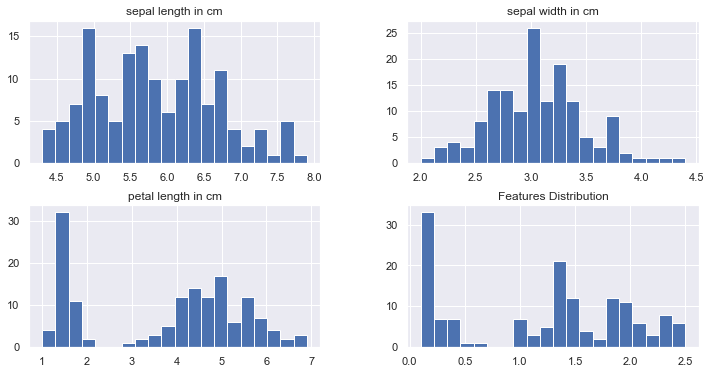

In [12]:
iris_df.hist(figsize=(12,6), bins=20)
plt.title("Features Distribution")
plt.show()

In [13]:
#finding correlation between the columns
iris_df.corr()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
sepal length in cm,1.000000,-0.103784,0.871283,0.816971
sepal width in cm,-0.103784,1.000000,-0.415218,-0.350733
petal length in cm,0.871283,-0.415218,1.000000,0.962314
petal width in cm,0.816971,-0.350733,0.962314,1.000000


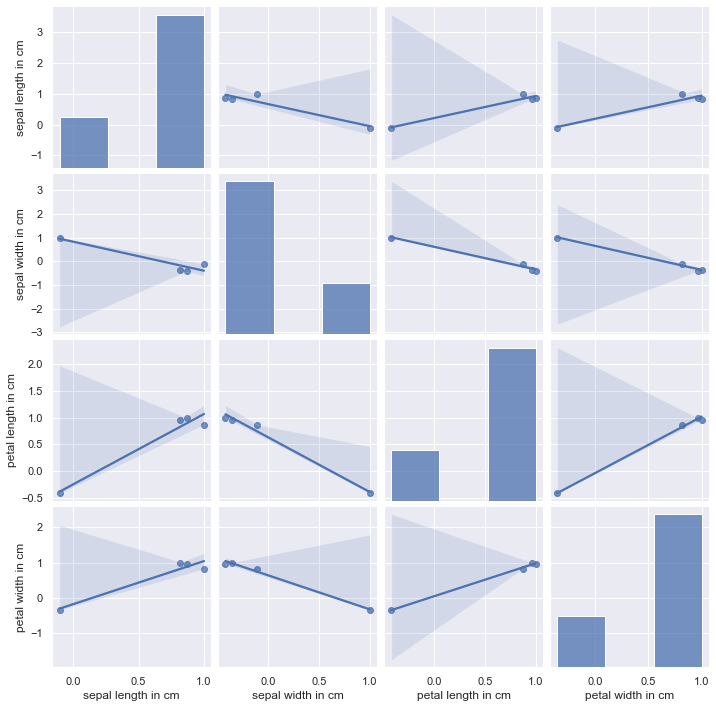

In [14]:
sns.pairplot(iris_df.corr(), kind='reg')

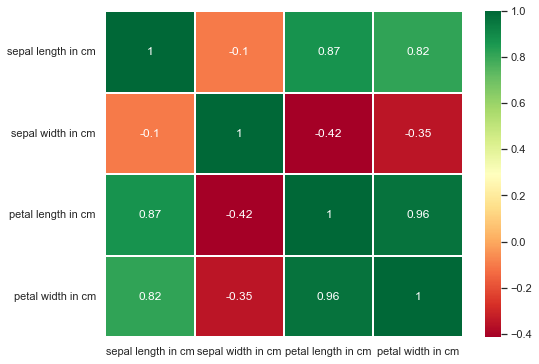

In [15]:
corrmat= iris_df.corr()
top_features = corrmat.index
plt.figure(figsize=(8,6))

graph = sns.heatmap(iris_df[top_features].corr(), annot= True, cmap='RdYlGn', linewidths=0.4)

In [16]:
#Separating x and y from dataset

X= iris_df.drop("class", axis=1)
y= iris_df["class"]

In [17]:
#training and splitting the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0)

## DecisionTreeClassifier

In [18]:
#using decision tree classifier on our data

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score

DTC_SCORE= accuracy_score(y_pred, y_test)
print("The accuracy score from Decision Tree Classifier is ",DTC_SCORE)

The accuracy score from Decision Tree Classifier is  0.9


## Support Vector Machine

In [20]:
from sklearn import svm

model2 = svm.SVC()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

In [21]:
SVM_Score = accuracy_score(y_pred2, y_test)
print("The accuracy score fromSupport Vector Machine is ",SVM_Score)

The accuracy score fromSupport Vector Machine is  0.9666666666666667


In [22]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix

print("Confusion Matrix of DecisionTreeClassifier\n", confusion_matrix(y_pred, y_test))
print("Confusion Matrix of SupportVectorMachine\n", confusion_matrix(y_pred2, y_test))

Confusion Matrix of DecisionTreeClassifier
 [[12  0  0]
 [ 0 10  3]
 [ 0  0  5]]
Confusion Matrix of SupportVectorMachine
 [[12  0  0]
 [ 0 10  1]
 [ 0  0  7]]


In [23]:
from sklearn.metrics import classification_report

print("Classification Report of DecisionTreeClassifier\n", classification_report(y_pred, y_test))
print("Classification Report of SupportVectorMachine\n", classification_report(y_pred2, y_test))

Classification Report of DecisionTreeClassifier
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.77      0.87        13
 Iris-virginica       0.62      1.00      0.77         5

       accuracy                           0.90        30
      macro avg       0.88      0.92      0.88        30
   weighted avg       0.94      0.90      0.91        30

Classification Report of SupportVectorMachine
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [24]:
data = [['DCT_Predict',DTC_SCORE],['SVM_Predcit',SVM_Score]]
predictions = pd.DataFrame(data,columns=["Classifier","Predicted_value"])
predictions.head()

,Classifier,Predicted_value
0,DCT_Predict,0.900000
1,SVM_Predcit,0.966667


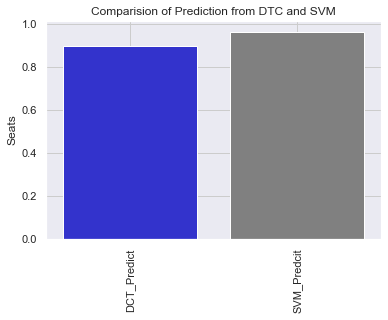

In [25]:
#Comparing both the accuracies side by side

sns.set()
plt.figure()

# This is where the actual plot gets made
ax = sns.barplot(data=predictions, x="Classifier", y="Predicted_value", palette=['blue', 'grey'], saturation=0.6)

# Customise some display properties
ax.set_title('Comparision of Prediction from DTC and SVM')
ax.grid(color='#cccccc')
ax.set_ylabel('Seats')
ax.set_xlabel(None)
ax.set_xticklabels(predictions["Classifier"].unique().astype(str), rotation='vertical')

plt.show()